RIO-125: Rank features of a smartphone - Build a python application to classify and rank dataset

### LIFE CYCLE OF A DATA SCIENCE PROJECT

#### 1 Data Gathering 

#### 2 Data Analysis

#### 3 Feature Engineering 

#### 4 Feature Selection

#### 5 Model Building 

#### 6 Hyper-Parametric Tuning 

### Step 3- Feature Engineering


#### 1. Missing Values

#### 2. Temporal Variables

#### 3. Categorical Variables : remove rare labels

#### 4. Transform the values of the variables to same range

IMPORTING SOME LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import seaborn as sns

CREATING THE DATA - FRAME

In [2]:
df = pd.read_csv(r'C:\Users\hp\Desktop\PROJECT\train.csv')

AS WE HAVE CHECKED WHILE DATA ANALYSIS THAT DATA SET HAS NO MISSING VALUE SO NO FEATURE ENGG REQUIRED FOR  MISSING VALUES 

THE DATASET DOESN'T HAVE ANY TEMPORAL VARIABLES

In [3]:
df.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

SPLITTING FEATURES INTO CONTINUOUS AND CATEGORICAL FEATURES

In [4]:
continuous_num_features = [column for column in df.columns if len(df[column].unique())>=15]
categorical_num_features = [column for column in df.columns if column not in continuous_num_features]

In [5]:
for column in categorical_num_features:
    print(column , " has ", list(df[column].unique())," labels")

blue  has  [0, 1]  labels
dual_sim  has  [0, 1]  labels
four_g  has  [0, 1]  labels
m_dep  has  [0.6, 0.7, 0.9, 0.8, 0.1, 0.5, 1.0, 0.3, 0.4, 0.2]  labels
n_cores  has  [2, 3, 5, 6, 1, 8, 4, 7]  labels
three_g  has  [0, 1]  labels
touch_screen  has  [0, 1]  labels
wifi  has  [1, 0]  labels
price_range  has  [1, 2, 3, 0]  labels


WE CAN SEE THAT FEATURE IS NOT HAVING LARGER NO OF LABELS . AT MAX IT HAS 10 LABELS

In [6]:
df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

IT'S A BALANCED DATASET

AS WE HAVE SEEN THAT IS DATASET DOESN'T MAKE BELL SHAPED DISTRIBUTION IN DATA ANALYSIS SO WE WILL APPLY NORMALIZATION ON THE DATASET

COPYING THE DATASET

In [7]:
data1 = df.copy()

LET'S NORMALIZE THE FEATURES 

In [10]:
x = data1.drop('price_range',axis =1)
y = data1.price_range

In [11]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


HERE x IS INPUT INDEPENDENT VARIABLES AND y IS OUTPUT DEPENDENT VARIABLE 

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaled_norm = MinMaxScaler()
scaled_norm = pd.DataFrame(scaled_norm.fit_transform(x),columns = data1.columns[:-1])
scaled_norm.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0
5,0.907148,0.0,0.00,1.0,0.157895,0.0,0.322581,0.666667,0.700000,0.000000,0.35,0.512245,0.770360,0.216729,0.857143,0.055556,0.444444,1.0,0.0,0.0
6,0.881764,0.0,0.48,0.0,0.210526,1.0,0.129032,0.777778,0.491667,1.000000,0.50,0.194388,0.345794,0.792090,0.571429,0.444444,0.888889,1.0,0.0,1.0
7,0.970608,0.0,0.00,1.0,0.000000,0.0,0.354839,0.777778,0.891667,0.428571,0.00,0.261224,0.433244,0.118653,0.785714,0.166667,0.166667,1.0,1.0,1.0
8,0.630595,1.0,0.00,0.0,0.000000,0.0,0.822581,0.666667,0.783333,0.857143,0.70,0.196939,0.224299,0.225281,0.857143,0.055556,1.000000,1.0,0.0,0.0
9,0.005344,1.0,0.04,1.0,0.105263,1.0,0.112903,0.000000,0.108333,0.571429,0.75,0.580102,0.483311,0.068680,1.000000,0.555556,0.555556,1.0,0.0,0.0


SO I SCALED THE FEATURES 

NOW FEATURE'S VALUES IS BETWEEN 0 AND 1 (INCLUDING 0 AND 1)

ADDING OUTPUT FEATURE TO THE scaled_norm data frame 

In [12]:
scaled_norm['price_range'] = data1.price_range

In [13]:
scaled_norm.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,1
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,2
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,2
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,2
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,1
5,0.907148,0.0,0.00,1.0,0.157895,0.0,0.322581,0.666667,0.700000,0.000000,...,0.512245,0.770360,0.216729,0.857143,0.055556,0.444444,1.0,0.0,0.0,1
6,0.881764,0.0,0.48,0.0,0.210526,1.0,0.129032,0.777778,0.491667,1.000000,...,0.194388,0.345794,0.792090,0.571429,0.444444,0.888889,1.0,0.0,1.0,3
7,0.970608,0.0,0.00,1.0,0.000000,0.0,0.354839,0.777778,0.891667,0.428571,...,0.261224,0.433244,0.118653,0.785714,0.166667,0.166667,1.0,1.0,1.0,0
8,0.630595,1.0,0.00,0.0,0.000000,0.0,0.822581,0.666667,0.783333,0.857143,...,0.196939,0.224299,0.225281,0.857143,0.055556,1.000000,1.0,0.0,0.0,0
9,0.005344,1.0,0.04,1.0,0.105263,1.0,0.112903,0.000000,0.108333,0.571429,...,0.580102,0.483311,0.068680,1.000000,0.555556,0.555556,1.0,0.0,0.0,0


LET'S SPLIT DATASET INTO TRAIN AND TEST DATASET

In [14]:
##splitting into 80:20

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(scaled_norm.drop('price_range',axis=1),scaled_norm['price_range'],test_size = 0.2,random_state =0)

In [15]:
x_train.shape

(1600, 20)

In [16]:
x_test.shape

(400, 20)

### Step -4 Feature Selection

1-> REMOVE THE LOW VARIANCE FEATURES

2-> CHECK THE PEARSON RELATIONSHIP BETWWEN THE INDEPENDENT FEATURES

3-> TO SELECT ON BASIS OF MUTUAL GAIN HAVING CLASSIFIER O/P

4-> TO SELECT ON BASIS OF MUTUAL GAIN HAVING REGRESSOR O/P

5-> TO SELECT ON BASIS OF FIESCHER TEST

6-> FEATURE IMPORTANCE 

#### WAY - 1 REMOVE LOW VARIANCE FEATURES

In [17]:
from sklearn.feature_selection import VarianceThreshold

var_thresh = VarianceThreshold()
var_thresh.fit(x_train,y_train)
x_train.columns[var_thresh.get_support()]

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

THIS SHOWS NO ONE HAS LOW VARIANCE

#### WAY - 2 CHECK RELATION BETWEEN INDEPENDENT VARIABLES 

RELATIONSHIP BETWWEN INDEPENDENT FEATURES

In [18]:
x_train.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
battery_power,1.000000,0.010458,-0.010598,-0.043354,0.032715,0.020508,-0.009002,0.034707,-0.003179,0.019731,0.020406,0.017076,-0.006008,-0.009150,-0.027405,-0.027801,0.062304,0.017268,-0.001153,-0.004483
blue,0.010458,1.000000,0.015063,0.031842,0.030418,0.014594,0.033523,-0.002841,-0.013677,0.034514,0.006574,-0.012154,-0.042549,0.035320,-0.001262,0.013211,0.004029,-0.030005,0.023285,-0.014138
clock_speed,-0.010598,0.015063,1.000000,-0.002722,0.002617,-0.052252,0.005075,-0.003874,-0.014589,0.005265,-0.012487,-0.027630,-0.011592,0.004078,-0.037809,-0.001768,-0.003051,-0.047452,0.015020,-0.042348
dual_sim,-0.043354,0.031842,-0.002722,1.000000,-0.042541,-0.000386,-0.031895,-0.014072,0.005609,-0.025906,-0.030417,-0.011655,0.016823,0.037883,-0.010797,-0.009144,-0.043238,-0.018555,-0.022282,0.045864
fc,0.032715,0.030418,0.002617,-0.042541,1.000000,-0.012684,-0.026783,-0.020219,0.024096,-0.004624,0.635178,-0.023735,-0.005145,0.009466,-0.020976,-0.005686,0.012942,-0.000363,-0.018058,0.039885
four_g,0.020508,0.014594,-0.052252,-0.000386,-0.012684,1.000000,0.002975,-0.008002,-0.020647,-0.039688,-0.009383,-0.014683,0.016999,-0.006799,0.013480,0.025315,-0.031618,0.578418,0.032839,-0.009349
int_memory,-0.009002,0.033523,0.005075,-0.031895,-0.026783,0.002975,1.000000,-0.004534,-0.034186,-0.034209,-0.016490,-0.000976,-0.018514,0.044134,0.029094,0.004877,0.010259,-0.003715,-0.049438,0.010829
m_dep,0.034707,-0.002841,-0.003874,-0.014072,-0.020219,-0.008002,-0.004534,1.000000,0.028306,0.004624,0.025757,0.034968,0.022862,-0.002356,-0.014470,-0.014818,0.029997,-0.007955,-0.000659,-0.019703
mobile_wt,-0.003179,-0.013677,-0.014589,0.005609,0.024096,-0.020647,-0.034186,0.028306,1.000000,-0.011986,0.032316,0.004612,0.016343,-0.002199,-0.022960,-0.016157,-0.010605,0.007794,-0.008882,0.001727
n_cores,0.019731,0.034514,0.005265,-0.025906,-0.004624,-0.039688,-0.034209,0.004624,-0.011986,1.000000,0.010303,-0.019491,0.026453,0.012695,-0.010207,0.034910,0.005088,-0.016280,0.025346,-0.014116


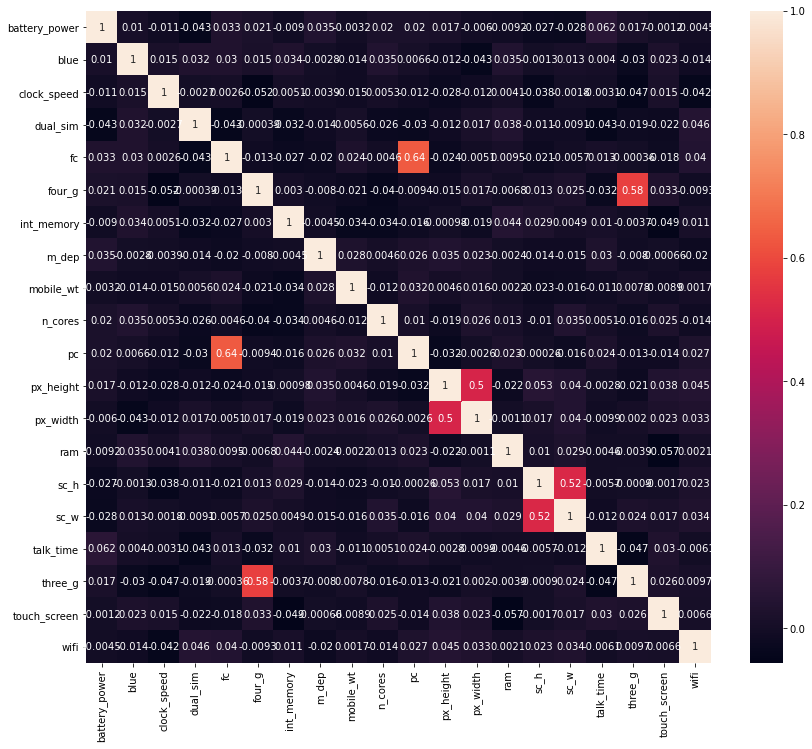

In [19]:
plt.figure(figsize = (14,12))
sns.heatmap(x_train.corr(),annot =True)
plt.show()

FROM PLOT WE CAN SEE THAT MAX TWO FEATURE ARE CORRELATED WITH FRACTION 0.64 WHICH PROVES THAT THEY ARE NOT MUCH RELATED TO EACH OTHER 

LET'S GO FOR ANOTHER SELECTION WAY

#### WAY - 3 SELECTION ON BASIS OF MUTUAL GAIN

In [20]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(x_train,y_train)
print(mutual_info)

[4.84510383e-02 2.08563583e-02 0.00000000e+00 0.00000000e+00
 2.84735694e-02 0.00000000e+00 1.55032937e-02 0.00000000e+00
 0.00000000e+00 3.00092465e-04 0.00000000e+00 4.08665902e-02
 2.20613400e-02 8.29219689e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.17890538e-02 2.93201133e-02]


In [21]:
mutual_info = pd.Series(mutual_info , index = x_train.columns)
mutual_info.sort_values(ascending =False)

ram              0.829220
battery_power    0.048451
px_height        0.040867
wifi             0.029320
fc               0.028474
px_width         0.022061
blue             0.020856
int_memory       0.015503
touch_screen     0.011789
n_cores          0.000300
sc_w             0.000000
sc_h             0.000000
talk_time        0.000000
three_g          0.000000
pc               0.000000
mobile_wt        0.000000
m_dep            0.000000
four_g           0.000000
dual_sim         0.000000
clock_speed      0.000000
dtype: float64

THIS SHOWS THAT FEATURE WHICH IS HAVING 0 VALUE IMPLIES THAT THAT FEATURE IS OF 0 IMPOTANCE FOR THE O/P

THIS IS THE RANK OF THE FEATURE FROM HIGHER TO LOWER WICH ARE IMPORTANT WHILE PREDICTING THE OUTPUT

ram FEATURE IS VERY IMPORTANT WHILE PREDICTING THE O/P

<AxesSubplot:>

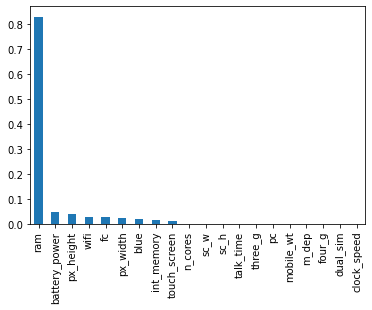

In [22]:
mutual_info.sort_values(ascending =False).plot.bar()

NOW AM GOING TO SELECT THE FEATURES WHO HAS MORE IMPORTANCE 

In [23]:
select = {column : round(mutual_info[column],5) for column in mutual_info.keys() if mutual_info[column]>0 }

In [24]:
select

{'battery_power': 0.04845,
 'blue': 0.02086,
 'fc': 0.02847,
 'int_memory': 0.0155,
 'n_cores': 0.0003,
 'px_height': 0.04087,
 'px_width': 0.02206,
 'ram': 0.82922,
 'touch_screen': 0.01179,
 'wifi': 0.02932}

LIST OF ELEMENTS HAVING LOW IMPORTANCE 

In [25]:
remove = [column for column in mutual_info.keys() if column not in select]

In [26]:
remove

['clock_speed',
 'dual_sim',
 'four_g',
 'm_dep',
 'mobile_wt',
 'pc',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g']


NOW REMOVING THE ELEMENTS NON IMPORTANT FROM THE SET

In [27]:
x_train = x_train.drop(remove , axis = 1)

In [28]:
x_train.head()

,battery_power,blue,fc,int_memory,n_cores,px_height,px_width,ram,touch_screen,wifi
582,0.488310,0.0,0.052632,0.354839,0.571429,0.184184,0.206275,0.267504,0.0,0.0
159,0.894456,0.0,0.631579,0.516129,0.000000,0.158673,0.697597,0.219669,0.0,0.0
1827,0.795591,0.0,0.210526,0.000000,0.000000,0.968878,0.937250,0.941475,1.0,1.0
318,0.004676,0.0,0.368421,0.645161,0.000000,0.019898,0.038051,0.108765,0.0,0.0
708,0.317969,1.0,0.105263,0.532258,0.142857,0.766327,0.909212,0.924105,1.0,1.0


In [29]:
x_test = x_test.drop(remove , axis =1)

In [30]:
x_test.head()

,battery_power,blue,fc,int_memory,n_cores,px_height,px_width,ram,touch_screen,wifi
405,0.636607,1.0,0.052632,0.516129,0.428571,0.127551,0.355808,0.845270,1.0,0.0
1190,0.394790,1.0,0.526316,0.145161,0.285714,0.238776,0.047397,0.128541,1.0,0.0
1132,0.683367,1.0,0.000000,0.129032,0.428571,0.078571,0.033378,0.647247,0.0,1.0
731,0.872411,1.0,0.105263,0.758065,0.000000,0.171939,0.590120,0.440941,1.0,1.0
1754,0.390782,1.0,0.000000,0.661290,0.714286,0.028571,0.433912,0.809460,1.0,0.0


NOW WE HAVE IDENTIFIED THE FEATURES WHICH ARE IMPORTANT AND REMOVED IT TOO

NOW WE NEED TO BUILD MODELS-MODEL BUILDING

#### WAY - 4 OF FEATURE SELECTION IE; MUTUAL_INFO IS FOR REGRESSION TYPE O/P- NO NEED TO APPLY HERE 

#### WAY - 5 OF FEATURE SELECTION FIESHER TEST. LET'S DO IT NOW

In [31]:
x_train,x_test,y_train,y_test = train_test_split(scaled_norm.drop('price_range',axis=1),scaled_norm['price_range'],test_size = 0.2,random_state =0)

In [32]:
from sklearn.feature_selection import chi2

f_p_val = chi2(x_train,y_train)

In [33]:
f_p_val

(array([1.28216560e+01, 1.40127358e+00, 2.02153844e-01, 6.24301869e-01,
        4.65038748e-01, 1.24890071e+00, 1.28452957e+00, 4.31708942e-01,
        1.80101591e+00, 2.69945111e+00, 2.79315718e-01, 6.66283473e+00,
        7.92207674e+00, 2.24552217e+02, 7.01452074e-01, 8.27028597e-01,
        5.22862902e-01, 2.31936485e-02, 3.33175408e+00, 9.94585406e-02]),
 array([5.03859579e-03, 7.05236224e-01, 9.77240847e-01, 8.90847171e-01,
        9.26502303e-01, 7.41301351e-01, 7.32809921e-01, 9.33617017e-01,
        6.14713886e-01, 4.40320581e-01, 9.63870506e-01, 8.34572305e-02,
        4.76498970e-02, 2.08269442e-48, 8.72862353e-01, 8.42991822e-01,
        9.13840575e-01, 9.99067062e-01, 3.43247465e-01, 9.91902322e-01]))

HERE , f_p_val[0] IS GIVING F - SCORE
HERE ,f_p_val[1] IS GIVING P - VALUE

#### 1 THE MORE VALUE OF THE F-SCORE THE MORE IMPORTANT IS THE FEATURE 
#### 2 THE LESSER THE VALUE OF P THE MORE IMPORTANT IS THE FEATURE 

WE CAN GO WITH THE EITHER ONE 

In [34]:
f_score = pd.Series(f_p_val[0],index = x_train.columns)
print(f_score.sort_values(ascending =False))

ram              224.552217
battery_power     12.821656
px_width           7.922077
px_height          6.662835
touch_screen       3.331754
n_cores            2.699451
mobile_wt          1.801016
blue               1.401274
int_memory         1.284530
four_g             1.248901
sc_w               0.827029
sc_h               0.701452
dual_sim           0.624302
talk_time          0.522863
fc                 0.465039
m_dep              0.431709
pc                 0.279316
clock_speed        0.202154
wifi               0.099459
three_g            0.023194
dtype: float64


SO HERE ram IS THE MOST IMPORTANT FEATURE CONTRIBUTIN TO THE O/P AND three_g IS THE LEAST IMPORTANT FEATURE 

<AxesSubplot:>

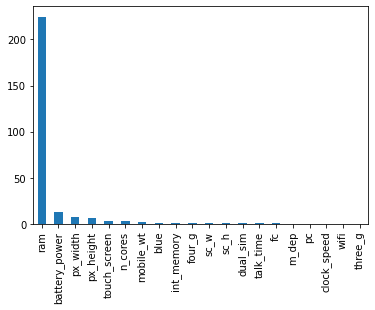

In [35]:
f_score.sort_values(ascending =False).plot.bar()

BY THIS WAY WE WILL ANOTHER TYPE OF LIST OF FEATURES TO BE REOMVED

In [36]:
select = {column : round(f_score[column],5) for column in f_score.keys() if f_score[column]>1}

In [37]:
select

{'battery_power': 12.82166,
 'blue': 1.40127,
 'four_g': 1.2489,
 'int_memory': 1.28453,
 'mobile_wt': 1.80102,
 'n_cores': 2.69945,
 'px_height': 6.66283,
 'px_width': 7.92208,
 'ram': 224.55222,
 'touch_screen': 3.33175}

In [38]:
remove = [column for column in f_score.keys() if column not in select]

In [39]:
remove

['clock_speed',
 'dual_sim',
 'fc',
 'm_dep',
 'pc',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'wifi']

DROPPING FEATURES WHICH ARE NOT IMPORTANT 

In [40]:
x_train = x_train.drop(remove,axis=1)
x_test = x_test.drop(remove , axis =1)

In [41]:
x_train.head()

,battery_power,blue,four_g,int_memory,mobile_wt,n_cores,px_height,px_width,ram,touch_screen
582,0.488310,0.0,1.0,0.354839,0.741667,0.571429,0.184184,0.206275,0.267504,0.0
159,0.894456,0.0,0.0,0.516129,0.516667,0.000000,0.158673,0.697597,0.219669,0.0
1827,0.795591,0.0,1.0,0.000000,0.216667,0.000000,0.968878,0.937250,0.941475,1.0
318,0.004676,0.0,1.0,0.645161,0.116667,0.000000,0.019898,0.038051,0.108765,0.0
708,0.317969,1.0,0.0,0.532258,0.708333,0.142857,0.766327,0.909212,0.924105,1.0


In [42]:
x_test.head()

,battery_power,blue,four_g,int_memory,mobile_wt,n_cores,px_height,px_width,ram,touch_screen
405,0.636607,1.0,0.0,0.516129,0.025000,0.428571,0.127551,0.355808,0.845270,1.0
1190,0.394790,1.0,0.0,0.145161,0.725000,0.285714,0.238776,0.047397,0.128541,1.0
1132,0.683367,1.0,0.0,0.129032,0.783333,0.428571,0.078571,0.033378,0.647247,0.0
731,0.872411,1.0,0.0,0.758065,0.375000,0.000000,0.171939,0.590120,0.440941,1.0
1754,0.390782,1.0,1.0,0.661290,0.258333,0.714286,0.028571,0.433912,0.809460,1.0


NOW WE JUST NEED TO BUILD THE MODELS ON THIS BASIS 

#### WAY - 6 FEATURE IMPORTANCE 

In [43]:
from sklearn.ensemble import ExtraTreesClassifier

In [44]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [45]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [46]:
extratc=ExtraTreesClassifier()
extratc.fit(x,y)

ExtraTreesClassifier()

In [47]:
extratc.feature_importances_

array([0.06071522, 0.01957195, 0.03257787, 0.02042774, 0.03254662,
       0.01676288, 0.0341203 , 0.03405401, 0.0358907 , 0.03264112,
       0.03313124, 0.04739315, 0.04852741, 0.39562478, 0.03375832,
       0.03440139, 0.03388514, 0.014899  , 0.01843156, 0.02063959])

In [48]:
extra_f=pd.Series(extratc.feature_importances_,index=x.columns)

<AxesSubplot:>

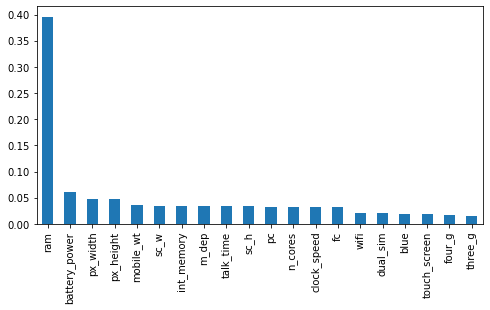

In [49]:
plt.figure(figsize=(8,4))
extra_f.sort_values(ascending=False).plot.bar()

LIST OF FEATURES TO BE REMOVED FROM THE DATA SET

In [50]:
remove=list(extra_f.sort_values(ascending=False).index[14:])
remove

['wifi', 'dual_sim', 'blue', 'touch_screen', 'four_g', 'three_g']

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =0)

REMOVING FROM THE TRAIN AND TEST SET

In [52]:
x_train = x_train.drop(remove,axis=1)
x_test = x_test.drop(remove , axis =1)

#### SO BASICALLY WHAT I HAVE DONE HERE I NORMALIZED MY DATA SET (FEATURE SCALING) AND THEN APPLIED THE FEATURE SELECTION WAYS 

#### I WILL TRY TO TRANSFORM MY CONTINUOUS AND CATEGORICAL NUMERICAL FEATURE TO GIVE A NORMAL DISTRIBUTION AND THEN , I WILL PERFORM STANDARDIZATION or NORMALIZATION AND THEN FEATURE SELECTION  

#### HERE I WILL IMPUTE THE CONTINUOUS VARIABLES EXPONENTIALLY AND TRANFORMING THE CATEGORICAL VAIORABLES BY COUNT/ FREQUENCY COUNT 

In [53]:
data2 =df.copy()

In [54]:
## FUNCTION TO PLOT

import pylab
import scipy.stats as stat

def plot_QQ(dataset,feature):
    plt.subplot(1,2,1)
    dataset[feature].hist(bins =20)
    plt.subplot(1,2,2)
    stat.probplot(dataset[feature],plot = pylab)
    plt.show()

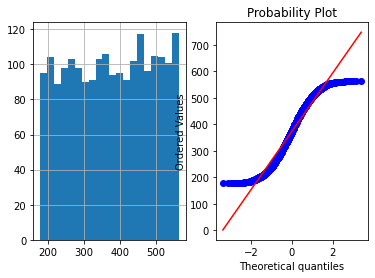

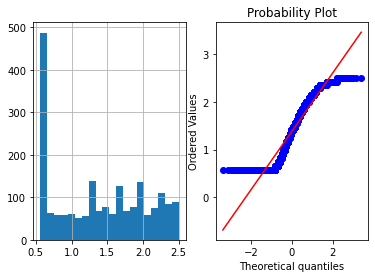

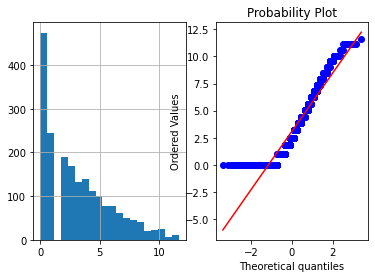

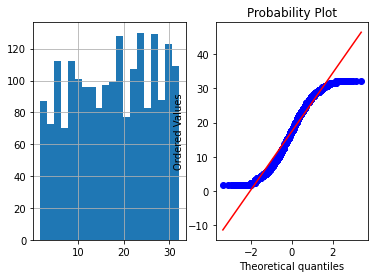

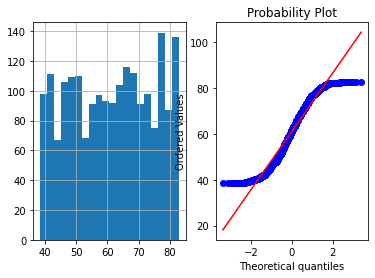

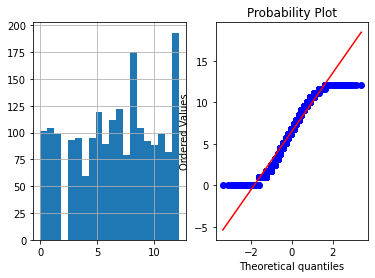

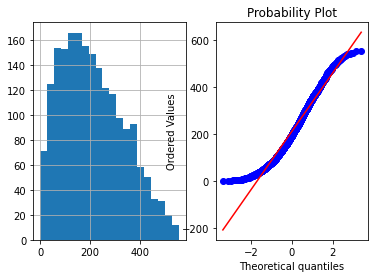

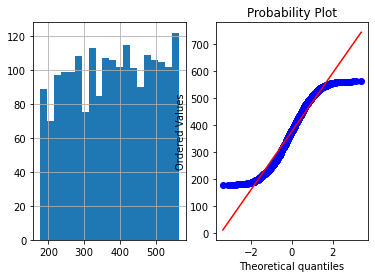

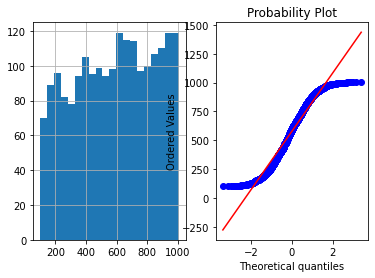

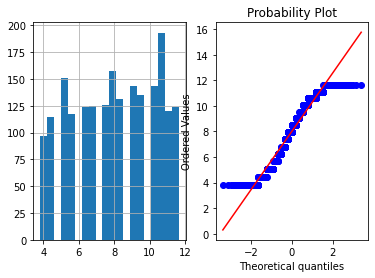

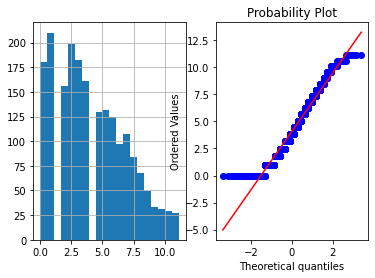

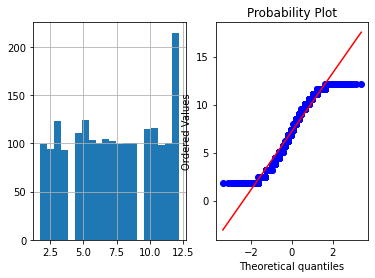

In [55]:
### applying the exponential transformation on continuous variables

for feature in continuous_num_features:
    data2[feature] = df[feature]**(1/1.2)
    plot_QQ(data2,feature)

I CAN SEE THAT MODET OF THE POINTS ARE FALLING ON THE LINE WHICH IMPLIES IT A MORE LIKELY A NORMAL DISTRIBUTED 

In [56]:
## CATEGORICAL FEATURES

def freq_count(dataset,feature):
    if feature == 'price_range':
        pass
    else:
        count = dataset[feature].value_counts().to_dict()
        
        dataset[feature] = dataset[feature].map(count)

In [57]:
for feature in categorical_num_features:
    freq_count(data2,feature)

In [58]:
data2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,274.006002,1010,1.929089,981,1.000000,957,5.061140,186,78.547351,247,...,12.139245,250.477179,689.670309,6.240251,5.061140,11.631293,477,994,1014,1
1,321.752146,990,0.561231,1019,0.000000,1043,27.346173,200,59.972077,246,...,290.987153,560.635142,708.109966,10.601666,2.498050,5.061140,1523,1006,986,2
2,195.925214,990,0.561231,1019,1.781797,1043,22.079363,195,63.261575,246,...,384.151729,495.942206,701.824417,7.376108,1.781797,6.240251,1523,1006,986,2
3,210.893210,990,2.145936,981,0.000000,957,6.812921,208,58.128986,230,...,372.201380,512.744738,738.928578,10.079368,5.656854,7.376108,1523,994,986,2
4,521.104658,990,1.164084,981,8.477858,1043,23.417682,186,61.803907,247,...,370.159681,371.180811,421.313955,5.656854,1.781797,9.551598,1523,1006,986,1


I WILL DO STANDARDIATION 

In [59]:
x = data2.drop('price_range',axis =1)
y = data2['price_range']

In [60]:
from sklearn.preprocessing import StandardScaler

scaled_std = StandardScaler()
scaled_std = pd.DataFrame(scaled_std.fit_transform(x),columns  = data2.columns[:-1])
scaled_std['price_range'] = data2['price_range']
scaled_std.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.892800,0.990050,0.844417,-1.019184,-0.748565,-1.043966,-1.434700,-0.502556,1.331597,-0.291494,...,-1.587624,-1.153108,0.425282,-0.765764,0.347508,1.412550,-1.786861,-1.006018,0.986097,1
1,-0.468513,-1.010051,-1.293774,0.981177,-1.103236,0.957886,1.132465,-0.235746,-0.098429,-0.372487,...,0.629749,1.653063,0.496971,1.101376,-0.587597,-0.701156,0.559641,0.994018,-1.014099,2
2,-1.586652,-1.010051,-1.293774,0.981177,-0.471285,0.957886,0.525745,-0.331035,0.154814,-0.372487,...,1.370585,1.067750,0.472534,-0.279499,-0.848910,-0.321820,0.559641,0.994018,-1.014099,2
3,-1.453641,-1.010051,1.183385,-1.019184,-1.103236,-1.043966,-1.232901,-0.083283,-0.240321,-1.668374,...,1.275557,1.219772,0.616787,0.877778,0.564845,0.043600,0.559641,-1.006018,-1.014099,2
4,1.302998,-1.010051,-0.351414,-1.019184,1.903610,0.957886,0.679915,-0.502556,0.042595,-0.291494,...,1.259322,-0.061035,-0.618024,-1.015519,-0.848910,0.743485,0.559641,0.994018,-1.014099,1
5,1.383386,0.990050,-1.293774,0.981177,-0.217251,-1.043966,-0.503727,-0.235746,0.681089,-0.696459,...,0.838839,0.932238,-0.958305,1.101376,-1.134137,-0.137585,0.559641,-1.006018,-1.014099,1
6,1.302998,0.990050,0.261391,-1.019184,0.022773,0.957886,-1.232901,-0.083283,-0.013713,0.437443,...,-0.558922,-0.515373,1.001722,0.192165,0.564845,1.247695,0.559641,-1.006018,0.986097,3
7,1.583173,0.990050,-1.293774,0.981177,-1.103236,-1.043966,-0.389870,-0.083283,1.304781,1.895317,...,-0.244705,-0.207148,-1.342690,0.877778,-0.587597,-1.099282,0.559641,0.994018,0.986097,0
8,0.491255,-1.010051,-1.293774,-1.019184,-1.103236,-1.043966,1.132465,-0.235746,0.953940,0.680422,...,-0.546629,-0.954959,-0.925953,1.101376,-1.134137,1.575965,0.559641,-1.006018,-1.014099,0
9,-1.726968,-1.010051,-1.149824,0.981177,-0.471285,0.957886,-1.298871,2.051197,-1.351755,-0.372487,...,1.114430,-0.033349,-1.551088,1.542164,0.986618,0.222056,0.559641,-1.006018,-1.014099,0


In [61]:
x = scaled_std.drop('price_range',axis =1)
y = scaled_std['price_range']

#### FEATURE SELECTION 

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =0)

#### APPLY WAY -3 OF FEATURE SEELCTION BY MUTUAL GAIN

In [63]:
mutual_info = mutual_info_classif(x_train,y_train)
mutual_info

array([4.53051130e-02, 3.11584355e-02, 0.00000000e+00, 0.00000000e+00,
       2.31161186e-02, 6.54259215e-03, 9.61514134e-03, 1.62603847e-02,
       1.54676635e-02, 0.00000000e+00, 0.00000000e+00, 3.60132996e-02,
       2.12614748e-02, 8.25480584e-01, 0.00000000e+00, 4.23239323e-02,
       2.05741831e-02, 0.00000000e+00, 5.18828412e-04, 1.25708497e-02])

In [64]:
mutual_info = pd.Series(mutual_info,index = x_train.columns)
mutual_info.sort_values(ascending=False)

ram              0.825481
battery_power    0.045305
sc_w             0.042324
px_height        0.036013
blue             0.031158
fc               0.023116
px_width         0.021261
talk_time        0.020574
m_dep            0.016260
mobile_wt        0.015468
wifi             0.012571
int_memory       0.009615
four_g           0.006543
touch_screen     0.000519
pc               0.000000
sc_h             0.000000
dual_sim         0.000000
clock_speed      0.000000
three_g          0.000000
n_cores          0.000000
dtype: float64

THIS IS THE RANK OF THE FEATURES HIGHER TO LOWER ON BASIS OF MUTUAL GAIN

ram IS THE MOST IMPORTANT WHILE n_cores IS OF LESS IMPORTANCE

<AxesSubplot:>

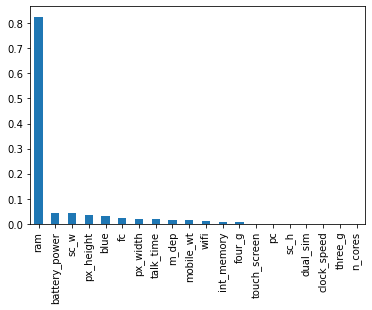

In [65]:
mutual_info.sort_values(ascending=False).plot.bar()

SELECTING THE IMPORTANT FEATUERS

In [66]:
select = {column : round(mutual_info[column],5) for column in mutual_info.keys() if mutual_info[column]>0 }

In [67]:
select

{'battery_power': 0.04531,
 'blue': 0.03116,
 'fc': 0.02312,
 'four_g': 0.00654,
 'int_memory': 0.00962,
 'm_dep': 0.01626,
 'mobile_wt': 0.01547,
 'px_height': 0.03601,
 'px_width': 0.02126,
 'ram': 0.82548,
 'sc_w': 0.04232,
 'talk_time': 0.02057,
 'touch_screen': 0.00052,
 'wifi': 0.01257}

LIST OF UN IMPORTANT FEATURES

In [68]:
remove = [column for column in mutual_info.keys() if mutual_info[column]==0]

In [69]:
remove

['clock_speed', 'dual_sim', 'n_cores', 'pc', 'sc_h', 'three_g']

DROPPING THE VARIABLES FROM TRAIN AND TEST SET NOW

In [70]:
x_train = x_train.drop(remove,axis=1)
x_test = x_test.drop(remove,axis=1)

#### WAY - 5 OF FEATURE SELECTION FIESHER TEST. WE CANNOT APPLY THIS WAY AS THIS WAY TAKES ONLY POSITIVE INPUT AND STANDARIZATION GIVES POSITIVE AND NEGATIVE  VALUES 

#### WAY - 6 FEATURE IMPORTANCE 

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =0)

In [72]:
extratc=ExtraTreesClassifier()
extratc.fit(x,y)

ExtraTreesClassifier()

In [73]:
extratc.feature_importances_

array([0.06024855, 0.01993029, 0.03400949, 0.0195522 , 0.03309041,
       0.01838243, 0.03598098, 0.03216256, 0.03846913, 0.03211993,
       0.03418176, 0.04682197, 0.05056462, 0.38811185, 0.0338522 ,
       0.03486314, 0.03500464, 0.01510688, 0.01697331, 0.02057366])

In [74]:
extra_f=pd.Series(extratc.feature_importances_,index=x.columns)

<AxesSubplot:>

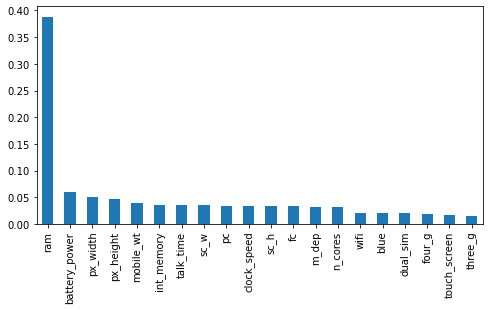

In [75]:
plt.figure(figsize=(8,4))
extra_f.sort_values(ascending=False).plot.bar()

LIST OF FEATURES TO BE REMOVED FROM THE DATA SET

In [76]:
remove=list(extra_f.sort_values(ascending=False).index[14:])
remove

['wifi', 'blue', 'dual_sim', 'four_g', 'touch_screen', 'three_g']

REMOVING FROM THE TRAIN AND TEST SET

In [77]:
x_train = x_train.drop(remove,axis=1)
x_test = x_test.drop(remove , axis =1)

#### NOW WE HAVE FOUND THE VARIABLES WHICH ARE IMPORTANT FOR PREDICTING OUTPUT... 
#### NEXT WE NEED TO BUILD MODELS AND PERFORM HYPER PARAMETRIC TUNING WHERE EVER NEEDED